This is the Model module

In [44]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

In [45]:
train_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_train.csv")
test_df = pd.read_csv("./3.3 Construct Data/Final Datasets/imputed_budget_test.csv")

In [46]:
X_vars = ['Adj Merged Budget']
y = ["Adj Merged Revenue"]

In [47]:
train_X = train_df[X_vars]
train_y = train_df[y]
test_X = test_df[X_vars]
test_y = test_df[y]

We decided to use the iterative importer with a random forrest regressor

In [48]:
imp = IterativeImputer(min_value=0, max_iter=1000, random_state=102, estimator=RandomForestRegressor())

Now to build the pipeline, we need the type of models we want to try.

In [49]:
# Step 3: Building the Pipeline
# Assuming train_X and train_y are your training features and target variable
# Convert train_y to a 1D array
train_y = np.ravel(train_y)

pipeline = Pipeline([
    ('imputer', imp),
    ('regressor', RandomForestRegressor())  # RandomForestRegressor without grid search
])

# Train the RandomForestRegressor
pipeline.fit(train_X, train_y)

# Get the trained model
trained_model = pipeline.named_steps['regressor']


c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [50]:
# Assuming you have test_X as your test features
# Make predictions using the trained model
predictions = pipeline.predict(test_X)

# Now you can use these predictions for further analysis or evaluation
# For instance, if you have test_y (actual target values), you can evaluate the model performance
# For example, using metrics like mean squared error (MSE) or R-squared
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assuming test_y is your actual target variable for the test data
# Evaluate the model
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
mape = mean_absolute_percentage_error(test_y, predictions)
r_squared = r2_score(test_y, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 900306957186801.1
Mean Absolute Error (MAE): 11789623.86170884
Mean Absolute Percentage Error (MAPE): 107.71114265141617
R-squared: 0.38125320696835263


c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Sam Oberly\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py

In [51]:
import matplotlib.pyplot as plt

In [52]:
test_y["Predictions"] = predictions

C:\Users\Sam Oberly\AppData\Local\Temp\ipykernel_21132\865344186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y["Predictions"] = predictions


In [53]:
test_y["differences"] = abs(test_y["Adj Merged Revenue"] - test_y["Predictions"])

C:\Users\Sam Oberly\AppData\Local\Temp\ipykernel_21132\502878929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_y["differences"] = abs(test_y["Adj Merged Revenue"] - test_y["Predictions"])


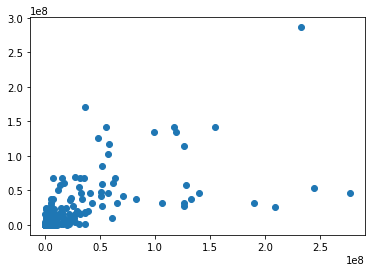

In [57]:
plt.scatter(np.array(test_y["Adj Merged Revenue"]), np.array(test_y["Predictions"]))